# Introduction to Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-dirivng car recognizing the car in front.

## Get the data

The images we're working with are form the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However, it's modified it to only use two classes (pizza 🍕 & steak 🥩)

> 🔑 **Note:** We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up. 

In [1]:
import zipfile

!python -m wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()


Saved under pizza_steak (3).zip


## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project ... this usually means visualizing many samples of your data.

In [2]:
import os

# Walk through pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    if filenames == ['.DS_Store']:
        print(f'There are {len(dirnames)} directories in {dirpath}.')
    else:
        print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories in pizza_steak.
There are 2 directories in pizza_steak\test.
There are 0 directories and 250 images in pizza_steak\test\pizza.
There are 1 directories and 250 images in pizza_steak\test\steak.
There are 0 directories and 1 images in pizza_steak\test\steak\.ipynb_checkpoints.
There are 2 directories in pizza_steak\train.
There are 0 directories and 750 images in pizza_steak\train\pizza.
There are 0 directories and 750 images in pizza_steak\train\steak.


In [3]:
# Another way to find out how many images are in a file

num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically

In [4]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names for the subdirectory
class_names = class_names[1:]

In [5]:
# Let's visualize our images
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class
    
    # Get random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # Read in the iamge and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    plt.show()
    print(f'Image shape: {img.shape}') # Show the shape of the image
    return img

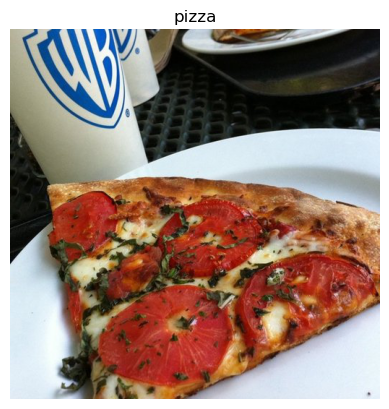

Image shape: (512, 512, 3)


In [6]:
img = view_random_image(target_dir='pizza_steak/train/',
                  target_class='pizza')

In [7]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[184, 182, 157],
        [184, 182, 157],
        [184, 182, 157],
        ...,
        [ 15,  13,  16],
        [ 16,  14,  17],
        [ 17,  15,  20]],

       [[182, 180, 155],
        [182, 180, 155],
        [183, 181, 156],
        ...,
        [ 15,  13,  16],
        [ 17,  15,  18],
        [ 17,  15,  20]],

       [[181, 179, 154],
        [181, 179, 154],
        [181, 179, 154],
        ...,
        [ 16,  14,  17],
        [ 17,  15,  18],
        [ 18,  16,  21]],

       ...,

       [[226, 235, 244],
        [226, 235, 244],
        [226, 235, 244],
        ...,
        [229, 239, 248],
        [230, 239, 248],
        [230, 239, 248]],

       [[227, 236, 245],
        [226, 235, 244],
        [226, 235, 244],
        ...,
        [231, 240, 249],
        [231, 240, 249],
        [231, 240, 249]],

       [[228, 237, 246],
        [227, 236, 245],
        [227, 236, 245],
        ...,
        [233, 241, 25

In [8]:
# View the image shape
img.shape # returns width, height, colour channels 

(512, 512, 3)

> 🔑 Note: As we've discussed before, many machine learning models, including NN prefer the values they work with to be between 0 and 1. Knowing this, on of the most common preprocessing steps for working with images is to **scale** (also referred to as normalized) their pixel values by dividing image arrays by 255 (since 255 is the maximum pixel value).

In [9]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.72156863, 0.71372549, 0.61568627],
        [0.72156863, 0.71372549, 0.61568627],
        [0.72156863, 0.71372549, 0.61568627],
        ...,
        [0.05882353, 0.05098039, 0.0627451 ],
        [0.0627451 , 0.05490196, 0.06666667],
        [0.06666667, 0.05882353, 0.07843137]],

       [[0.71372549, 0.70588235, 0.60784314],
        [0.71372549, 0.70588235, 0.60784314],
        [0.71764706, 0.70980392, 0.61176471],
        ...,
        [0.05882353, 0.05098039, 0.0627451 ],
        [0.06666667, 0.05882353, 0.07058824],
        [0.06666667, 0.05882353, 0.07843137]],

       [[0.70980392, 0.70196078, 0.60392157],
        [0.70980392, 0.70196078, 0.60392157],
        [0.70980392, 0.70196078, 0.60392157],
        ...,
        [0.0627451 , 0.05490196, 0.06666667],
        [0.06666667, 0.05882353, 0.07058824],
        [0.07058824, 0.0627451 , 0.08235294]],

       ...,

       [[0.88627451, 0.92156863, 0.95686275],
        [0.88627451, 0.92156863, 0.95686275],
        [0.88627451, 0

## And end-to-end example
Let's build a convolutional NN to find patterns in our images, more specifically we need a way to :
* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all the pixel values between 0 & 1, also scaling/normalization )
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths to our data directories
train_dir = './pizza_steak/train'
test_dir = './pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                              batch_size = 32,
                                              target_size = (224, 224),
                                              class_mode= 'binary',
                                              seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size = 32,
                                              target_size = (224, 224),
                                               class_mode = 'binary',
                                               seed = 42)

# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                          kernel_size = 3,
                          activation = 'relu',
                          input_shape = (224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size = 2,
                             padding = 'valid'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model 
history_1 = model_1.fit(train_data, 
                       epochs=5,
                       steps_per_epoch = len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 501 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 18s 254ms/step - loss: 0.5415 - accuracy: 0.7273 - val_loss: 0.3655 - val_accuracy: 0.8403
Epoch 2/5
47/47 [==============================] - 9s 198ms/step - loss: 0.4097 - accuracy: 0.8293 - val_loss: 0.3259 - val_accuracy: 0.8623
Epoch 3/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3778 - accuracy: 0.8327 - val_loss: 0.3650 - val_accuracy: 0.8443
Epoch 4/5
47/47 [==============================] - 9s 189ms/step - loss: 0.3609 - accuracy: 0.8427 - val_loss: 0.3083 - val_accuracy: 0.8723
Epoch 5/5
47/47 [==============================] - 9s 182ms/step - loss: 0.3286 - accuracy: 0.8667 - val_loss: 0.2929 - val_accuracy: 0.8762


> 🔑 **Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using GPU

In [11]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

## Using the same model as before 

This is to contrast the usefulness of CNN over images. Let's replicate the model we've built in the previous notebook to see if it works with our image data.

In [12]:
# Set random seed 

tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224, 224, 3)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model

model_2.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy']
               )

# Fit the model
history_2 = model_2.fit(train_data,
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 1.5392 - accuracy: 0.4987 - val_loss: 0.6932 - val_accuracy: 0.5010
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5010
Epoch 3/5
47/47 [==============================] - 9s 183ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5010
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5010
Epoch 5/5
47/47 [==============================] - 9s 194ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5010


In [13]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 602116    
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20 x more parameters than our CNN (model_1), model_2 performs terribly.. let's try to improve it

In [14]:
# Set random seed

tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (224,224,3)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile model 
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                       epochs = 5,
                       steps_per_epoch= len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 185ms/step - loss: 4.2011 - accuracy: 0.6120 - val_loss: 1.6571 - val_accuracy: 0.7605
Epoch 2/5
47/47 [==============================] - 8s 181ms/step - loss: 1.1347 - accuracy: 0.7147 - val_loss: 1.6345 - val_accuracy: 0.5689
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.6379 - accuracy: 0.7773 - val_loss: 0.6477 - val_accuracy: 0.7784
Epoch 4/5
47/47 [==============================] - 10s 213ms/step - loss: 0.8897 - accuracy: 0.7460 - val_loss: 0.8208 - val_accuracy: 0.7106
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.8253 - accuracy: 0.7487 - val_loss: 0.8905 - val_accuracy: 0.7505


In [15]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                9633856   
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 9,635,969
Trainable params: 9,635,969
Non-trainable params: 0
_________________________________________________________________


🔑**Note**: You can think of trainable parameters as **patterns a model can learn from data.** Intuitively, you might think more is better. And lots it cases, it is. But in this case, the difference here is the two different styles of model we're using. Wherea series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image.** So even though these are less learnable parameters in our convolutional neural network, these are often more helpful in dechiphering between different **features** in an image.

## Binary classification let's break it down.

1. Become one with the data  (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling / normalizing)
3. Create a model (start with a baseline)
4. Fit the model 
5. Evaluate the model
6. Adjust different parameters and impreove the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data



In [16]:
def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class
    
    # Get random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    
    # Read in the iamge and plot it using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f'Image shape: {img.shape}') # Show the shape of the image
    return img
    
   

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


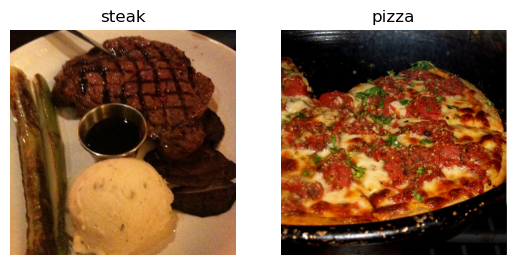

In [17]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')
plt.show()

### 2. Pre-process the data (prepare it for a model)

In [18]:
# Define directory dataset paths 
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

Our next step is to turn our data into **batches**. 

A batch is a small subset of a dataset that the model looks during training. Rather than see 10K examples at one time, the model just might look at 32 images at the time. 

It does this for a couple of reasons:
1. 10K images (or more) might not fit into the memory of your processor (GPU).
2. Tryinh to learn the patterns in 10K images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health.. https://twitter.com/ylecun/status/989610208497360896?lang=en

In [19]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/225.)
test_datagen = ImageDataGenerator(rescale = 1/225.)

In [20]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory = train_dir, # Target directory of images
                                              target_size=(224, 224), # Target size of images (height, width)
                                              class_mode = 'binary', # type of data you're working with
                                              batch_size = 32) # Size of minibatches to lad data into

test_data = test_datagen.flow_from_directory(directory = test_dir,
                                            target_size = (224, 224),
                                            class_mode = 'binary',
                                            batch_size = 32)

Found 1500 images belonging to 2 classes.
Found 501 images belonging to 2 classes.


In [21]:
# Get a sample of a training data batch
images, labels = train_data.next() # get the 'next' batch of iamges labels in train data
len(images), len(labels)

(32, 32)

In [22]:
# How many batches are there
len(train_data), 1500/32

(47, 46.875)

In [23]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.53333336, 0.46222222, 0.39111114],
          [0.54222226, 0.48444447, 0.41333336],
          [0.5511111 , 0.49333334, 0.42222223],
          ...,
          [0.94222224, 0.8044445 , 0.5511111 ],
          [0.95555556, 0.83111113, 0.6088889 ],
          [0.9955556 , 0.8755556 , 0.6666667 ]],
 
         [[0.5777778 , 0.48444447, 0.4088889 ],
          [0.5733333 , 0.48000002, 0.40444446],
          [0.5822222 , 0.50222224, 0.41333336],
          ...,
          [0.9377778 , 0.8       , 0.5466667 ],
          [0.9377778 , 0.8044445 , 0.5733333 ],
          [0.95555556, 0.83111113, 0.6088889 ]],
 
         [[0.59555554, 0.48444447, 0.39555556],
          [0.6088889 , 0.4977778 , 0.4088889 ],
          [0.6088889 , 0.51111114, 0.4088889 ],
          ...,
          [0.9377778 , 0.7955556 , 0.54222226],
          [0.9377778 , 0.8       , 0.56      ],
          [0.9466667 , 0.81333333, 0.5822222 ]],
 
         ...,
 
         [[0.88      , 0.64      , 0.3288889 ],
          [0.88444

In [24]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that your setup when beginning a machine learning experiment and then you keep experimenting, you try to beat a baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount of architectures you could create. So one of the best ways to get started is to start with something simple and see if it works and your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem)

In [25]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [26]:
# Create the model (this will be our baseline a layer convolution neural network)

model_4 = Sequential([
    Conv2D(filters = 10, # filter is the number of sliding windows going across an input (higher = more complex model).
          kernel_size = 3, # the size of the sliding window going across an input
          strides = 1, # the size of the step the sliding window takes across an input
          padding = 'valid', # if 'same' output shape is same as input shape, if "valid" output shape get compress
          activation = 'relu',
          input_shape = (224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation = 'relu'),
    Conv2D(10, 3, activation = 'relu'),
    Flatten(),
    Dense(1, activation = 'sigmoid') # output layer (working with binary classification so only 1 output neuron)
])

In [27]:
# Compile the model
model_4.compile(loss = 'binary_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])

In [28]:
# Get a summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [29]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [30]:
# Fit the model
history_4 = model_4.fit(train_data, # This is a combination of labels and sample data
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 10s 201ms/step - loss: 0.7868 - accuracy: 0.6820 - val_loss: 0.4530 - val_accuracy: 0.7904
Epoch 2/5
47/47 [==============================] - 9s 186ms/step - loss: 0.4417 - accuracy: 0.8133 - val_loss: 0.4073 - val_accuracy: 0.8363
Epoch 3/5
47/47 [==============================] - 9s 199ms/step - loss: 0.3217 - accuracy: 0.8753 - val_loss: 0.4122 - val_accuracy: 0.8224
Epoch 4/5
47/47 [==============================] - 11s 225ms/step - loss: 0.1805 - accuracy: 0.9367 - val_loss: 0.4517 - val_accuracy: 0.7944
Epoch 5/5
47/47 [==============================] - 9s 188ms/step - loss: 0.0776 - accuracy: 0.9853 - val_loss: 0.4963 - val_accuracy: 0.8124


### 5. Evaluating our model

It looks like our model learning something, let's evaluate it.

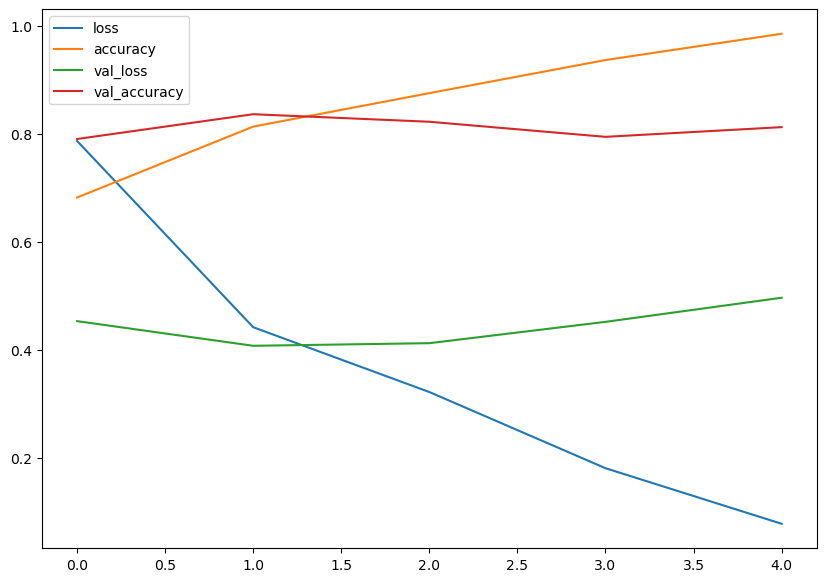

In [34]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize = (10,7))
plt.show()

In [37]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    '''
    Returns separate loss curvs for training and validation metrics. 
    '''
    
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    
    epochs = range(len(history.history['loss'])) # how many epochs we train on
    
    # Plot loss
    plt.figure()
    plt.plot(epochs, loss, label = 'training_loss')
    plt.plot(epochs, val_loss, label = 'val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()
    
    # Plot Accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label = 'training_accuracy')
    plt.plot(epochs, val_accuracy, label = 'val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()
    
    plt.show()
    

> 🔑**Note:** When a model's **validation loss start to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize.

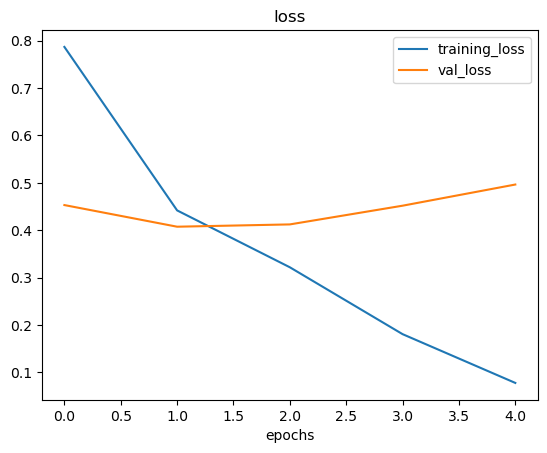

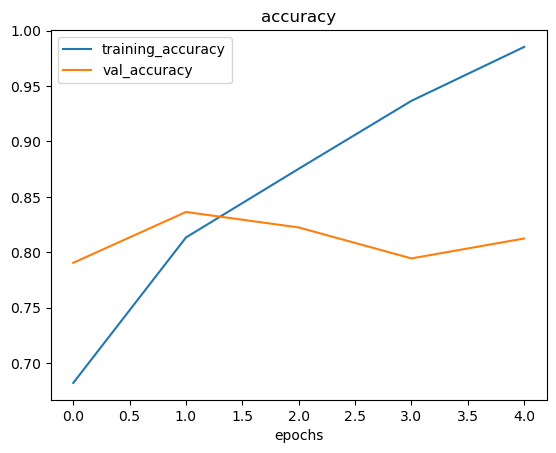

In [38]:
plot_loss_curves(history_4)

> 🔑**Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing similar rates), when there are large differences your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting. 

Ways to induce overfitting:
* Increase the number of conv layers (preferred)
* Increase the number of conv filters (preferred)
* Add another dense layer to the output of our flattened layer

Ways to reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2d)
* Add more data...

> 🔑 **Note:** Reducing overfitting is also known as *regularization*.


In [40]:
# Create a model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation = 'relu', input_shape = (224, 224, 3)),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

In [43]:
# Compile the model
model_5.compile(loss = 'binary_crossentropy',
               optimizer = Adam(),
               metrics = ['accuracy'])

In [45]:
# fit the model
history_5 = model_5.fit(train_data,
                       epochs = 5,
                       steps_per_epoch = len(train_data),
                       validation_data = test_data,
                       validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 209ms/step - loss: 0.6045 - accuracy: 0.6667 - val_loss: 0.4646 - val_accuracy: 0.7725
Epoch 2/5
47/47 [==============================] - 9s 185ms/step - loss: 0.4821 - accuracy: 0.7760 - val_loss: 0.3885 - val_accuracy: 0.8463
Epoch 3/5
47/47 [==============================] - 9s 184ms/step - loss: 0.4354 - accuracy: 0.8060 - val_loss: 0.3578 - val_accuracy: 0.8443
Epoch 4/5
47/47 [==============================] - 9s 181ms/step - loss: 0.4078 - accuracy: 0.8133 - val_loss: 0.3614 - val_accuracy: 0.8343
Epoch 5/5
47/47 [==============================] - 8s 181ms/step - loss: 0.3783 - accuracy: 0.8367 - val_loss: 0.3345 - val_accuracy: 0.8663


In [46]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 6760)             

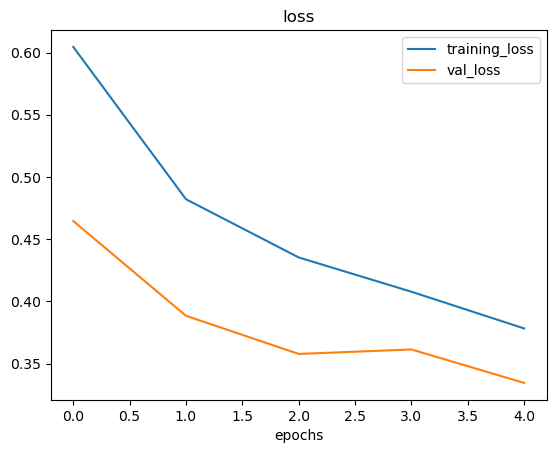

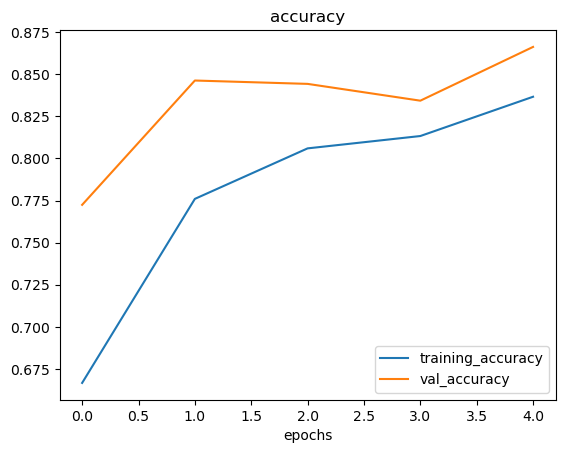

In [47]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation

In [49]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                            rotation_range=0.2, # how much do you want to rotate an image?
                                            shear_range = 0.2, # how much do you want to shear an image?
                                            zoom_range = 0.2, # zoom in randomly 
                                            width_shift_range=0.2, # move your image around x-axis
                                            height_shift_range=0.2, # move your image around y-axis
                                            horizontal_flip = True) # do you want to flip an image?

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale = 1/255.)

# Create ImageDataGenerator without data augmentation
test_datagen = ImageDataGenerator(rescale = 1/255.)

> 🤔 **Question:** What is data augmentation? 

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns.
Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

Let's write some code to visualize data augmentation...

In [50]:
# Import data and augment it form training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  shuffle=False) # for demonstration purposes only

# Create non-augmented train data batches
print('Non-augmented training data')
train_data = train_datagen.flow_from_directory(train_dir, 
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)
# Create non-augmented test data batches
print('Non-augmented test data')
test_data = test_datagen.flow_from_directory(test_dir,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'binary')

Augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented training data
Found 1500 images belonging to 2 classes.
Non-augmented test data
Found 501 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the train data. Using `ImageDataGenerator` build-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model. 

Finally .. let's visualize some augmented data!

In [51]:
# Get a sample augmented data batches
images, labels =  train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # note: labels are not augmented

showing image number: 2


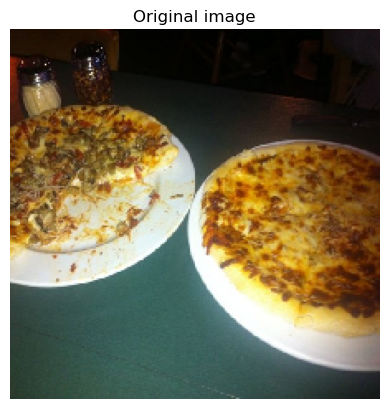

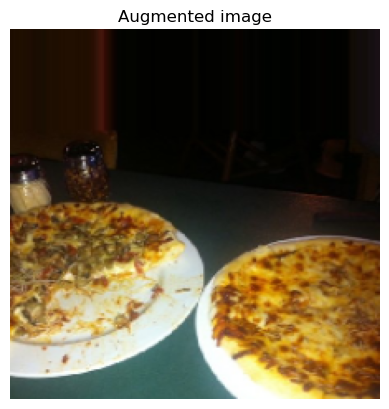

In [57]:
# Show the original image and augmented image
import random
random_number = random.randint(0, 32) #our batches size are 32..
print(f'showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)
plt.show()
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title('Augmented image')
plt.axis(False)
plt.show()

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data

In [60]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model_6.compile(loss = 'binary_crossentropy',
               optimizer= Adam(),
               metrics = ['accuracy'])

# Fit the model
history_6 = model_6.fit(train_data_augmented,
                       epochs = 5,
                       batch_size = 32,
                       steps_per_epoch = len(train_data_augmented),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 525ms/step - loss: 0.7047 - accuracy: 0.4907 - val_loss: 0.6905 - val_accuracy: 0.6168
Epoch 2/5
47/47 [==============================] - 25s 528ms/step - loss: 0.6906 - accuracy: 0.5560 - val_loss: 0.6747 - val_accuracy: 0.7465
Epoch 3/5
47/47 [==============================] - 24s 518ms/step - loss: 0.6838 - accuracy: 0.6420 - val_loss: 1.0160 - val_accuracy: 0.5010
Epoch 4/5
47/47 [==============================] - 24s 521ms/step - loss: 0.6855 - accuracy: 0.5467 - val_loss: 0.6638 - val_accuracy: 0.8064
Epoch 5/5
47/47 [==============================] - 25s 539ms/step - loss: 0.6654 - accuracy: 0.6933 - val_loss: 0.6181 - val_accuracy: 0.7804


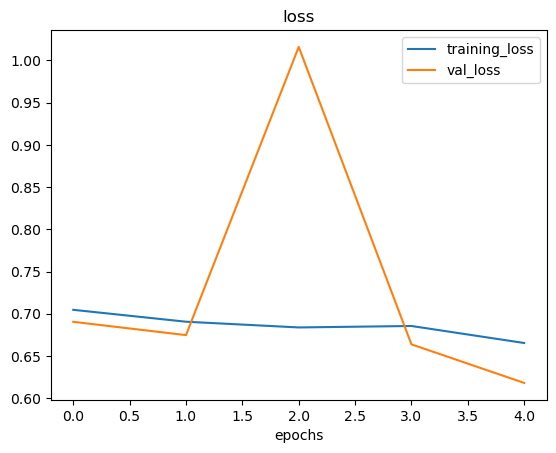

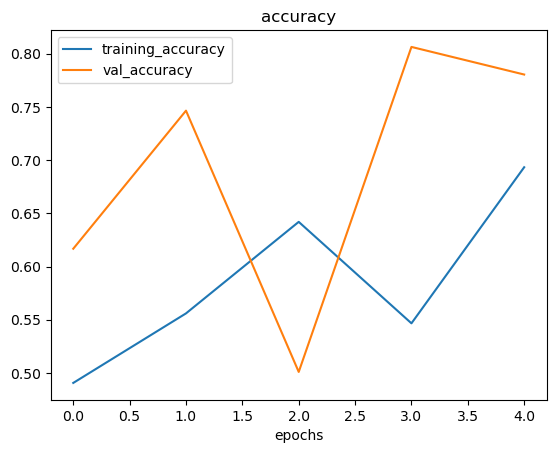

In [61]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before on it and see what happens.)

In [63]:
# Import data and augment it and shuffle from training directory
print('Augmented training data')
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir, 
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  shuffle=True) # shuffle data this time

Augmented training data
Found 1503 images belonging to 2 classes.


In [64]:
# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(pool_size = 2),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation = 'relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation = 'sigmoid')
])

# Compile the model
model_7.compile(loss = 'binary_crossentropy',
               optimizer= Adam(),
               metrics = ['accuracy'])

# Fit the model
history_7 = model_7.fit(train_data_augmented_shuffle, #we're fitting on augmented and shuffled data now
                       epochs = 5,
                       batch_size = 32,
                       steps_per_epoch = len(train_data_augmented_shuffle),
                       validation_data = test_data,
                       validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 531ms/step - loss: 0.6728 - accuracy: 0.5615 - val_loss: 0.5390 - val_accuracy: 0.7924
Epoch 2/5
47/47 [==============================] - 25s 536ms/step - loss: 0.5864 - accuracy: 0.6913 - val_loss: 0.3908 - val_accuracy: 0.8283
Epoch 3/5
47/47 [==============================] - 26s 551ms/step - loss: 0.5007 - accuracy: 0.7591 - val_loss: 0.3912 - val_accuracy: 0.8343
Epoch 4/5
47/47 [==============================] - 25s 528ms/step - loss: 0.4935 - accuracy: 0.7651 - val_loss: 0.3445 - val_accuracy: 0.8403
Epoch 5/5
47/47 [==============================] - 23s 494ms/step - loss: 0.4674 - accuracy: 0.7804 - val_loss: 0.3280 - val_accuracy: 0.8623


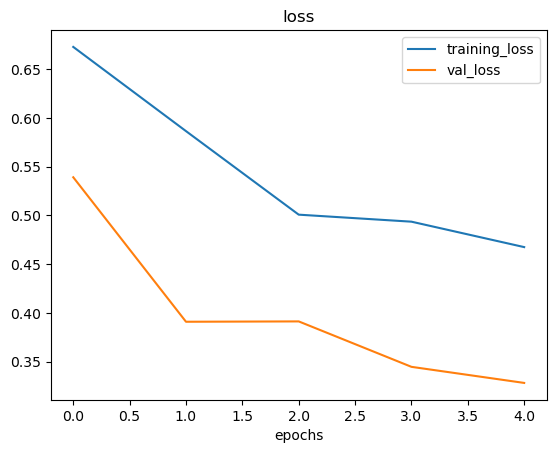

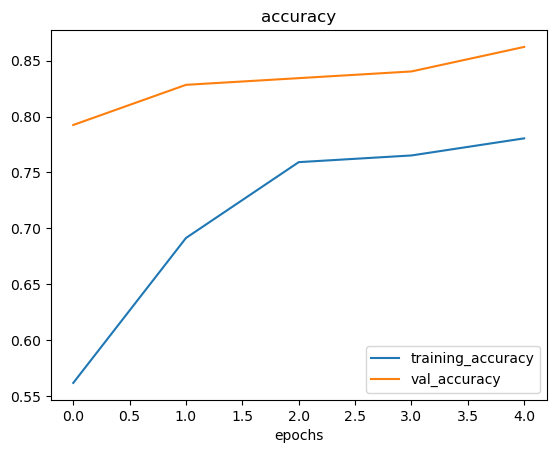

In [65]:
# Plot loss curves
plot_loss_curves(history_7)

>🔑 **Note:** When shuffling training data, the model gets exposed to all different kind of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak)

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2d`/ `MaxPool2d` layers)
* Increase the number of filters in each convolution layer (e.g. from 10 to 32 or even 64).
* Train for longer (more epochs).
* Find an ideal learning rate.
* Get more data (give the model more opportunities to learn)
* Use **transfer learning**  to leverage what another image model has learn and adjust it for our own use case. 